In [1]:
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [2]:
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
!pip install pydataset

In [4]:
df=pd.read_csv('product sales.csv')
df

,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,17,Youth (<25),1,M,canada,Bikes,2,1519,2443,1848,3038,4886
1,23,Youth (<25),1,M,Australia,Bikes,2,1252,2295,2086,2504,4590
2,33,Young Adults (25-34),1,F,France,Bikes,2,2171,3578,2814,4342,7156
3,39,Adults (35-64),1,M,United States,Bikes,2,713,1120,814,1426,2240
4,42,Adults (35-64),1,M,United States,Bikes,2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
113031,52,Adults (35-64),1,F,United Kingdom,Bikes,2,1555,2443,1776,3110,4886
113032,25,Young Adults (25-34),1,F,Germany,Bikes,1,713,1120,407,713,1120
113033,26,Young Adults (25-34),1,M,Australia,Bikes,1,713,1120,407,713,1120
113034,33,Young Adults (25-34),1,F,Australia,Bikes,1,1252,2295,1043,1252,2295


In [5]:
# Dataset Used : df

df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer_Age      113036 non-null  int64 
 1   Age_Group         113036 non-null  object
 2   Age_Group_NUMBER  113036 non-null  int64 
 3   Customer_Gender   113036 non-null  object
 4   Country           113036 non-null  object
 5   Product_Category  113036 non-null  object
 6   Order_Quantity    113036 non-null  int64 
 7   Unit_Cost         113036 non-null  int64 
 8   Unit_Price        113036 non-null  int64 
 9   Profit            113036 non-null  int64 
 10  Cost              113036 non-null  int64 
 11  Revenue           113036 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 10.3+ MB


0        0
75353    0
75364    0
75363    0
75362    0
dtype: int64

In [6]:
# Data Bifurcation 
df_cat = df[['Age_Group','Customer_Gender','Country','Product_Category']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']] # Non-Categorical Data 


In [7]:
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['Age_Group_code','Customer_Gender_code','Country_code','Product_Category_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,Age_Group,Customer_Gender,Country,Product_Category,Age_Group_code,Customer_Gender_code,Country_code,Product_Category_code
0,Youth (<25),M,canada,Bikes,3.0,1.0,5.0,1.0
1,Youth (<25),M,Australia,Bikes,3.0,1.0,0.0,1.0
2,Young Adults (25-34),F,France,Bikes,2.0,0.0,1.0,1.0
3,Adults (35-64),M,United States,Bikes,0.0,1.0,4.0,1.0
4,Adults (35-64),M,United States,Bikes,0.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...
113031,Adults (35-64),F,United Kingdom,Bikes,0.0,0.0,3.0,1.0
113032,Young Adults (25-34),F,Germany,Bikes,2.0,0.0,2.0,1.0
113033,Young Adults (25-34),M,Australia,Bikes,2.0,1.0,0.0,1.0
113034,Young Adults (25-34),F,Australia,Bikes,2.0,0.0,0.0,1.0


In [8]:
# Dataset Used : df_noncat_mdt


# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['Customer_Age_std','Age_Group_NUMBER_std','Order_Quantity_std','Unit_Cost_std','Unit_Price_std','Profit_std','Cost_std','Revenue_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat.join(df_noncat_std); df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
df_noncat_mdt_std = pd.merge(df_noncat, df_noncat_std, left_index=True, right_index=True); df_noncat_mdt_std

,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Age_std,Age_Group_NUMBER_std,Order_Quantity_std,Unit_Cost_std,Unit_Price_std,Profit_std,Cost_std,Revenue_std
0,17,1,2,1519,2443,1848,3038,4886,-1.716513,0.0,-1.035542,2.276516,2.158261,2.479202,2.902917,2.758157
1,23,1,2,1252,2295,2086,2504,4590,-1.172142,0.0,-1.035542,1.790914,1.997752,2.879150,2.299433,2.556274
2,33,1,2,2171,3578,2814,4342,7156,-0.264856,0.0,-1.035542,3.462330,3.389191,4.102519,4.376593,4.306381
3,39,1,2,713,1120,814,1426,2240,0.279516,0.0,-1.035542,0.810616,0.723441,0.741615,1.081164,0.953487
4,42,1,2,344,540,392,688,1080,0.551701,0.0,-1.035542,0.139503,0.094420,0.032464,0.247136,0.162325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,52,1,2,1555,2443,1776,3110,4886,1.458987,0.0,-1.035542,2.341990,2.158261,2.358210,2.984285,2.758157
113032,25,1,1,713,1120,407,713,1120,-0.990684,0.0,-1.140125,0.810616,0.723441,0.057671,0.275389,0.189606
113033,26,1,1,713,1120,407,713,1120,-0.899956,0.0,-1.140125,0.810616,0.723441,0.057671,0.275389,0.189606
113034,33,1,1,1252,2295,1043,1252,2295,-0.264856,0.0,-1.140125,1.790914,1.997752,1.126438,0.884523,0.990999


In [9]:
# Using Scikit Learn Ordinal Encoder : df_cat_mdt_code_oe [Superior]
# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
#df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Age_Group,Customer_Gender,Country,Product_Category,Age_Group_code,Customer_Gender_code,Country_code,Product_Category_code,Customer_Age,Age_Group_NUMBER,...,Cost,Revenue,Customer_Age_std,Age_Group_NUMBER_std,Order_Quantity_std,Unit_Cost_std,Unit_Price_std,Profit_std,Cost_std,Revenue_std
0,Youth (<25),M,canada,Bikes,3.0,1.0,5.0,1.0,17,1,...,3038,4886,-1.716513,0.0,-1.035542,2.276516,2.158261,2.479202,2.902917,2.758157
1,Youth (<25),M,Australia,Bikes,3.0,1.0,0.0,1.0,23,1,...,2504,4590,-1.172142,0.0,-1.035542,1.790914,1.997752,2.879150,2.299433,2.556274
2,Young Adults (25-34),F,France,Bikes,2.0,0.0,1.0,1.0,33,1,...,4342,7156,-0.264856,0.0,-1.035542,3.462330,3.389191,4.102519,4.376593,4.306381
3,Adults (35-64),M,United States,Bikes,0.0,1.0,4.0,1.0,39,1,...,1426,2240,0.279516,0.0,-1.035542,0.810616,0.723441,0.741615,1.081164,0.953487
4,Adults (35-64),M,United States,Bikes,0.0,1.0,4.0,1.0,42,1,...,688,1080,0.551701,0.0,-1.035542,0.139503,0.094420,0.032464,0.247136,0.162325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,Adults (35-64),F,United Kingdom,Bikes,0.0,0.0,3.0,1.0,52,1,...,3110,4886,1.458987,0.0,-1.035542,2.341990,2.158261,2.358210,2.984285,2.758157
113032,Young Adults (25-34),F,Germany,Bikes,2.0,0.0,2.0,1.0,25,1,...,713,1120,-0.990684,0.0,-1.140125,0.810616,0.723441,0.057671,0.275389,0.189606
113033,Young Adults (25-34),M,Australia,Bikes,2.0,1.0,0.0,1.0,26,1,...,713,1120,-0.899956,0.0,-1.140125,0.810616,0.723441,0.057671,0.275389,0.189606
113034,Young Adults (25-34),F,Australia,Bikes,2.0,0.0,0.0,1.0,33,1,...,1252,2295,-0.264856,0.0,-1.140125,1.790914,1.997752,1.126438,0.884523,0.990999


In [10]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
print(train_df) # Training Dataset
print(test_df) # Testing Dataset

                   Age_Group Customer_Gender         Country Product_Category  \
112403        Adults (35-64)               F   United States            Bikes   
79388   Young Adults (25-34)               M       Australia      Accessories   
18921            Youth (<25)               F       Australia      Accessories   
41725            Youth (<25)               M          canada      Accessories   
98424         Adults (35-64)               M   United States            Bikes   
...                      ...             ...             ...              ...   
89460   Young Adults (25-34)               F   United States      Accessories   
60620   Young Adults (25-34)               F          France            Bikes   
34086            Youth (<25)               M   United States            Bikes   
58067         Adults (35-64)               M       Australia            Bikes   
92975         Adults (35-64)               M  United Kingdom      Accessories   

        Age_Group_code  Cus

# DATA PRE PROCESSING

## Objective:

The objective of this data preprocessing exercise is to prepare the dataset for further analysis and modeling by encoding categorical variables using the Ordinal Encoder, standardizing non-categorical variables using the Standard Scaler, and splitting the dataset into training and testing subsets.

## Insight:

*Ordinal Encoder (Categorical Variables):*

Utilizing the Ordinal Encoder from Scikit Learn, the categorical variables in the dataset were encoded into numerical representations. This transformation ensures that categorical data can be used effectively in machine learning algorithms.
Standard Scaler (Non-Categorical Variables):

Non-categorical variables were standardized using the Standard Scaler from Scikit Learn. Standardization ensures that the variables are on the same scale, preventing biases in the modeling process due to differences in variable magnitudes.
Dataset Preprocessing:

The preprocessed categorical and non-categorical subsets were combined to create a pre-processed dataset. This dataset is ready for further analysis and modeling.
Dataset Splitting:

The pre-processed dataset was split into training and testing subsets using the train_test_split function. This enables the evaluation of machine learning models on unseen data.

## Analysis:

Ordinal Encoder:

The Ordinal Encoder effectively transformed categorical variables into numerical representations, facilitating their use in machine learning algorithms.
The encoded categorical variables included age group, customer gender, country, and product category.
Standard Scaler:

Standardization of non-categorical variables ensures that all variables are on the same scale, preventing biases in the modeling process.
Standardized non-categorical variables included customer age, order quantity, unit cost, unit price, profit, cost, and revenue.
Dataset Splitting:

The dataset was split into training and testing subsets to enable the evaluation of machine learning models on unseen data.
The training dataset comprises 75% of the pre-processed data, while the testing dataset comprises the remaining 25%.
Conclusion:
The data preprocessing steps, including encoding categorical variables, standardizing non-categorical variables, and splitting the dataset, have successfully prepared the data for further analysis and modeling. The pre-processed dataset is now ready to be used for building machine learning models to derive insights and make predictions.

## Managerial Implications:

Model Development:

The pre-processed dataset can be utilized to develop machine learning models for various business applications, such as customer segmentation, demand forecasting, and risk prediction.
Performance Evaluation:

By splitting the dataset into training and testing subsets, the performance of machine learning models can be evaluated accurately. This enables informed decision-making and ensures the reliability of model predictions.
Data-Driven Insights:

The insights derived from the pre-processed dataset can inform strategic decision-making and drive business growth. By leveraging machine learning models, organizations can uncover hidden patterns and trends in their data, leading to actionable insights.
Overall, the data preprocessing steps outlined in this report lay the foundation for extracting meaningful insights from the dataset and leveraging advanced analytics techniques to drive business success.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

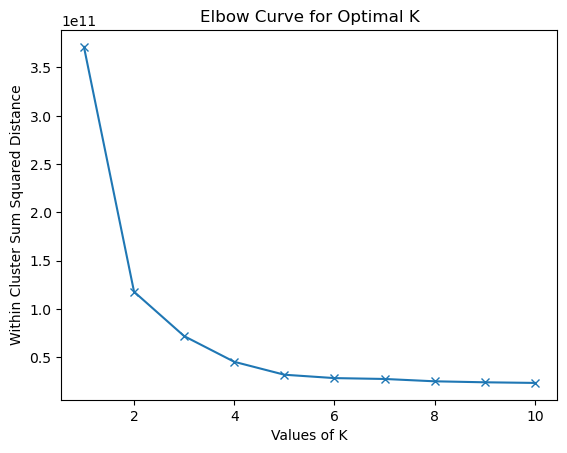

In [11]:
''' 
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
new_train_df= train_df[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(new_train_df)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()


## Objective:

The objective of this analysis is to determine the optimal number of clusters (K) for KMeans clustering using the Elbow Method. This method helps identify the number of clusters that best fits the dataset by analyzing the within-cluster sum squared distance (WCSSD).

## Insight:
The within-cluster sum squared distance (WCSSD) is a measure of the sum of squared distances of samples to their closest cluster center (centroid), weighted by the sample weights (if provided).
By plotting the WCSSD against different values of K (number of clusters), we can observe the "elbow" point where the rate of decrease in WCSSD slows down, indicating the optimal number of clusters.

## Analysis:
The provided code calculates the WCSSD for different values of K (ranging from 1 to 10) using the KMeans algorithm.
For each value of K, KMeans clustering is performed on the dataset, and the inertia (WCSSD) is computed and stored in a list.
The Elbow Curve is plotted, showing the relationship between the number of clusters (K) and the WCSSD.
The "elbow" point on the curve represents the optimal value of K, where adding more clusters does not significantly decrease the WCSSD.
Conclusion:
Based on the Elbow Curve, the optimal number of clusters (K) can be determined. This value is crucial for performing KMeans clustering effectively and obtaining meaningful clusters in the dataset.

## Managerial Implications:

Segmentation Strategy:
Identifying the optimal number of clusters enables organizations to segment their customers, products, or other entities effectively.
Resource Allocation:
By understanding the natural groupings in the data, resources can be allocated more efficiently to target specific segments or address specific needs.
Decision Support:
Insights derived from clustering analysis can inform strategic decision-making, such as marketing strategies, product development, and customer service initiatives.
Overall, KMeans clustering analysis provides valuable insights into the underlying structure of the data, helping organizations make informed decisions and drive business growth.

In [12]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(new_train_df); km_2cluster_model

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(new_train_df); km_3cluster_model

sscore_km_2cluster = sscore(new_train_df, km_2cluster_model); print(sscore_km_2cluster)
dbscore_km_2cluster = dbscore(new_train_df, km_2cluster_model); print(dbscore_km_2cluster)

sscore_km_3cluster = sscore(new_train_df, km_3cluster_model); print(sscore_km_3cluster)
dbscore_km_3cluster = dbscore(new_train_df
                              , km_3cluster_model); print(dbscore_km_3cluster)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8057646516451
0.5259460797635578
0.8072277324514561
0.4721431034408927


# KMeans Clustering Evaluation

## Objective:
The objective of this analysis is to evaluate the performance of KMeans clustering with different numbers of clusters using silhouette score and Davies-Bouldin score metrics.

Insight:
Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value ranges from -1 (poor clustering) to +1 (dense clustering).
Davies-Bouldin Score: Computes the average similarity between each cluster and its most similar cluster, where lower values indicate better clustering.

## Analysis:

Two-Cluster Model:

KMeans clustering with 2 clusters was performed on the dataset.
Silhouette Score: 0.8058
Davies-Bouldin Score: 0.5259
Three-Cluster Model:

KMeans clustering with 3 clusters was performed on the dataset.
Silhouette Score: 0.8072
Davies-Bouldin Score: 0.4721

Conclusion:
Both two-cluster and three-cluster models exhibit relatively high silhouette scores, indicating dense clustering.
The three-cluster model demonstrates slightly better clustering quality than the two-cluster model, as indicated by the higher silhouette score and lower Davies-Bouldin score.

## Managerial Implications:

Segmentation Refinement:
Based on the evaluation results, organizations can refine their segmentation strategies to better identify distinct customer segments or patterns in the data.
Targeted Marketing:
Improved clustering quality enables more targeted marketing efforts, leading to enhanced customer engagement and conversion rates.

Product Development:
Insights from refined clustering can inform product development initiatives tailored to specific customer needs or preferences.
Overall, the evaluation of KMeans clustering models provides valuable insights into the effectiveness of clustering techniques for understanding underlying patterns in the data and informing strategic decision-making processes.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_31024\2082758685.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['cluster'] = cluster_labels


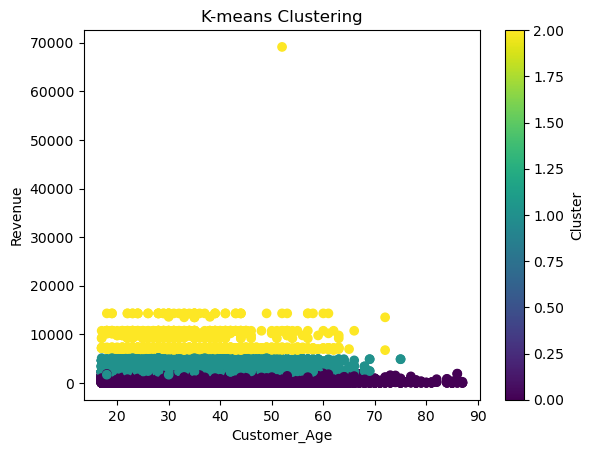

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

new_train_df= train_df[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]
# Specify the number of clusters
num_clusters = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(new_train_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
new_train_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(new_train_df['Customer_Age'], new_train_df['Revenue'], c=new_train_df['cluster'], cmap='viridis')
plt.xlabel('Customer_Age')
plt.ylabel('Revenue')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Visualization of KMeans Clustering

## Objective:
The objective of this visualization is to illustrate the clustering of data points using the KMeans algorithm with a specified number of clusters.

## Insight:
KMeans clustering partitions data points into clusters based on their similarity to cluster centroids.
Visualization helps to understand how data points are grouped into clusters based on chosen features.

## Analysis:
The dataset comprises features related to customer age, order quantity, unit cost, unit price, profit, cost, and revenue.
KMeans clustering with three clusters was performed on the dataset.
The scatter plot visualizes the clustering of data points in two dimensions (Customer Age vs. Revenue), with each point colored according to its assigned cluster.

Conclusion:
The scatter plot demonstrates the grouping of data points into three distinct clusters based on their similarity in terms of customer age and revenue.
The visualization provides a clear representation of how customers are segmented into different clusters, allowing for a better understanding of customer behavior and preferences.

## Managerial Implications:
Targeted Marketing Strategies:
Insights from clustering visualization can inform targeted marketing strategies tailored to different customer segments.

Product Pricing and Offerings:
Understanding cluster characteristics enables organizations to optimize product pricing and offerings to meet the specific needs and preferences of each segment.

Customer Relationship Management:
Effective segmentation facilitates personalized customer relationship management, leading to improved customer satisfaction and loyalty.

Overall, visualization of KMeans clustering results aids in deriving actionable insights for strategic decision-making and customer-centric business strategies.

C:\Users\HP\AppData\Local\Temp\ipykernel_31024\2868653875.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['cluster'] = cluster_labels


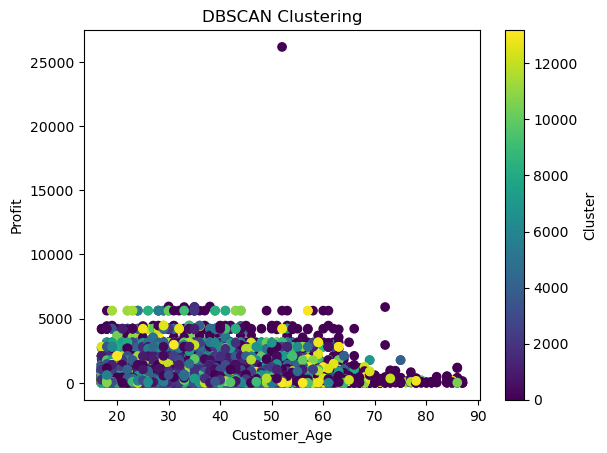

In [23]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

new_train_df= train_df[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]
# Assuming 'train_new_df' contains your preprocessed data

# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.0000005, min_samples=2)

# Fit DBSCAN clustering model to the data
dbscan.fit(new_train_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to DataFrame
new_train_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(new_train_df['Customer_Age'], new_train_df['Profit'], c=new_train_df['cluster'], cmap='viridis')
plt.xlabel('Customer_Age')
plt.ylabel('Profit')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')

# Adjust x-axis limits to make it smaller
#plt.xlim(0, 1000000)  # Set the range of x-axis from 0 to 100000
#plt.ylim(0,1000000)
plt.show()

# Visualization of DBSCAN Clustering

## Objective:
The objective of this visualization is to illustrate the clustering of data points using the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm.

## Insight:
DBSCAN is a density-based clustering algorithm that groups together points that are closely packed, marking as outliers those that lie alone in low-density regions.
Visualization helps to understand how data points are grouped into clusters and identify outliers based on chosen features.

## Analysis:
The dataset comprises features related to customer age, order quantity, unit cost, unit price, profit, cost, and revenue.
DBSCAN clustering with specified parameters (epsilon and minimum samples) was performed on the dataset.
The scatter plot visualizes the clustering of data points in two dimensions (Customer Age vs. Profit), with each point colored according to its assigned cluster.

Conclusion:
The scatter plot demonstrates the clustering of data points based on their density in the feature space, with each cluster represented by a distinct color.
Outliers, which do not belong to any cluster, are marked as noise points (typically labeled as -1 in DBSCAN).

## Managerial Implications:
Anomaly Detection:
Identification of outliers can help detect anomalies or irregularities in the data, which may require further investigation.

Quality Control:
DBSCAN clustering can aid in quality control by identifying data points that deviate significantly from the norm, helping to maintain product or service quality.

Resource Allocation:
Understanding cluster density and outliers allows for more efficient resource allocation, focusing efforts on areas with high-density clusters and addressing issues related to outliers.

Overall, visualization of DBSCAN clustering results provides valuable insights for anomaly detection, quality control, and resource allocation, contributing to informed decision-making and process optimization.






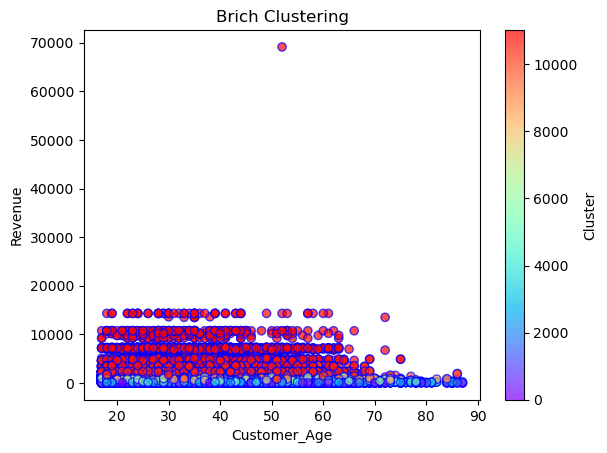

In [28]:
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

# Generating 600 samples using make_blobs
new_train_df=train_df[['Customer_Age','Age_Group_NUMBER','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

# Fit the data (Training)
model.fit(new_train_df)

# Predict the same data
pred = model.predict(new_train_df)

# Creating a scatter plot
plt.scatter(new_train_df['Customer_Age'], new_train_df['Revenue'], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.xlabel('Customer_Age')
plt.ylabel('Revenue')
plt.title('Brich Clustering')
plt.colorbar(label='Cluster')

plt.show()


# Visualization of BIRCH Clustering

## Objective:
The objective of this visualization is to illustrate the clustering of data points using the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm.

## Insight:
BIRCH is a hierarchical clustering algorithm designed to handle large datasets efficiently by clustering data points into a tree structure.
Visualization helps to understand how data points are grouped into clusters based on chosen features.

## Analysis:
The dataset comprises features related to customer age, order quantity, unit cost, unit price, profit, cost, and revenue.
BIRCH clustering with specified parameters (branching factor, threshold) was performed on the dataset.
The scatter plot visualizes the clustering of data points in two dimensions (Customer Age vs. Revenue), with each point colored according to its assigned cluster.

Conclusion:
The scatter plot demonstrates the clustering of data points based on their similarity in the feature space, with each cluster represented by a distinct color.
BIRCH clustering creates a hierarchical structure of clusters, which can be useful for analyzing data at different levels of granularity.

## Managerial Implications:
Hierarchical Analysis:
BIRCH clustering provides a hierarchical view of the data, enabling analysis at different levels of detail and granularity.

Pattern Recognition:
Understanding cluster structures can aid in pattern recognition and identifying trends or anomalies in the data.

Resource Allocation:
Insights from BIRCH clustering can inform resource allocation strategies, optimizing efforts based on the distribution of clusters.

Overall, visualization of BIRCH clustering results offers valuable insights for hierarchical analysis, pattern recognition, and resource allocation, contributing to informed decision-making and effective utilization of resources.

# Comparison of Clustering Algorithms

## Objective:
The objective of this comparison analysis is to evaluate and contrast the performance of three clustering algorithms: KMeans, DBSCAN, and BIRCH.

## Insight:
Each clustering algorithm has its strengths and weaknesses, which may make it suitable for different types of datasets and clustering tasks.
Comparison analysis helps to identify the advantages and limitations of each algorithm in different scenarios.

## Analysis:

*KMeans Clustering:*

Strengths:
Simple and easy to understand.
Efficient for datasets with a large number of samples.
Requires specifying the number of clusters (K), making it suitable for datasets with a clear number of clusters.
Weaknesses:
Sensitive to the initial placement of centroids and may converge to local optima.
Assumes clusters are spherical and of similar size, which may not hold true for all datasets.
Not suitable for datasets with irregular cluster shapes or varying densities.

*DBSCAN Clustering:*

Strengths:
Does not require specifying the number of clusters beforehand.
Robust to outliers and able to identify noise points.
Effective for datasets with irregular cluster shapes and varying densities.
Weaknesses:
Sensitive to the choice of parameters (epsilon and minimum samples).
May struggle with datasets of varying densities or high-dimensional data.
Slower for large datasets due to its density-based approach.

*BIRCH Clustering:*

Strengths:
Efficient for large datasets due to its hierarchical structure.
Able to handle streaming data and incremental updates.
Provides a hierarchical view of clusters, allowing analysis at different levels of granularity.
Weaknesses:
Requires specifying parameters such as branching factor and threshold.
May not perform well with high-dimensional or sparse data.
Sensitivity to parameters may affect clustering results.

Conclusion:
KMeans: Suitable for datasets with a clear number of clusters and when cluster shapes are approximately spherical.
DBSCAN: Effective for datasets with irregular cluster shapes, varying densities, and presence of outliers.
BIRCH: Efficient for large datasets and provides a hierarchical view of clusters, enabling analysis at different levels of granularity.

## Managerial Implications:
Algorithm Selection:
Choose the clustering algorithm based on the characteristics of the dataset and the clustering task at hand.

Quality Control:
Use DBSCAN for detecting outliers and anomalies in the data, especially in scenarios where data density varies.

Resource Allocation:
Utilize BIRCH clustering for efficient clustering of large datasets and hierarchical analysis of clusters.
Overall, the choice of clustering algorithm depends on the specific requirements of the analysis, the characteristics of the dataset, and the desired outcomes. By understanding the strengths and weaknesses of each algorithm, organizations can make informed decisions to derive actionable insights from their data.